## Business Understanding

In the telecommunications sector, retaining existing customers is more cost-effective than acquiring new ones. High churn rates can lead to significant revenue losses and increased marketing expenses. Understanding the factors that contribute to customer churn enables companies like SyriaTel to implement targeted retention strategies, thereby enhancing customer satisfaction and profitability.

## Problem Statement

SyriaTel is experiencing customer attrition, impacting its revenue and market share. The challenge is to develop a predictive model that accurately identifies customers who are likely to churn. By analyzing patterns in customer behavior and demographics, the goal is to proactively address the factors leading to churn and implement effective retention strategies.

## Objectives

**Regression**



**Classification**

1 Develop a machine learning classifier to predict the likelihood of a customer churning based on historical data. This involves analyzing customer demographics, usage patterns, and service-related attributes to identify significant predictors of churn.

2 Determine the primary causes of customer attrition hence offer insights based on data analysis to SyriaTel's marketing and customer service departments to improve customer retention strategies.

## Data understanding


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [43]:
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [44]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data cleaning

In [5]:
sns.pairplot(df)

### Correct formats

In [46]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

checking if the data has NAs

In [47]:
# CHeck NAs
df.isna().mean()*100


state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

- < 20% - drop rows/fill
- >20 - 50 - fill
- >50% drop column

The data has no missing values

###  checking if the data has duplicates

> Add blockquote



In [8]:
df[df.duplicated()].count()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data has no duplicates

### Other cleaning steps

In [48]:
  # OUtliers

  # Feature engineering

sns.boxplot(df)

<Axes: >

### Feature engineering

## EDA

### Univariate Analysis

In [49]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))
# Distribution of Account Length for Churn vs. Non-Churned Customers
plt.subplot(2, 2, 1)
sns.histplot(df, x="account length", hue="churn", kde=True, palette="coolwarm", bins=30)
plt.title("Distribution of Account Length by Churn Status")
# Customer Service Calls vs. Churn
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")
# Total Day Minutes vs. Churn
plt.subplot(2, 2, 3)
sns.boxplot(x="churn", y="total day minutes", data=df, palette="coolwarm")
plt.title("Total Day Minutes by Churn Status")
# International Plan vs. Churn
plt.subplot(2, 2, 4)
sns.countplot(x="international plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Rate by International Plan")
plt.tight_layout()
plt.show()


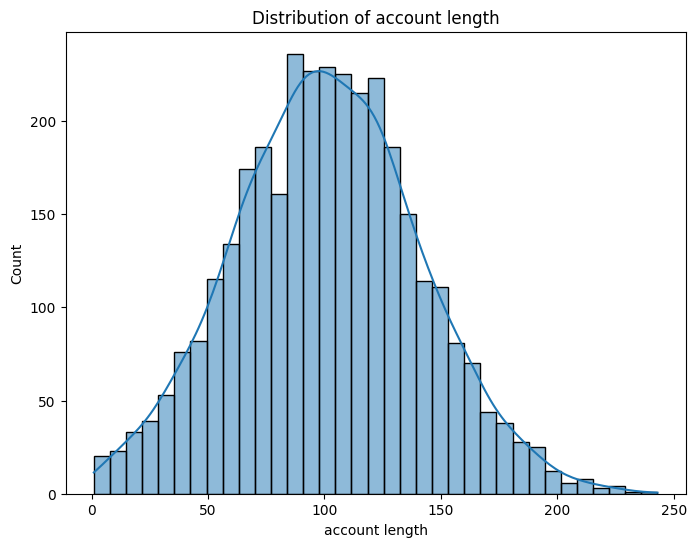

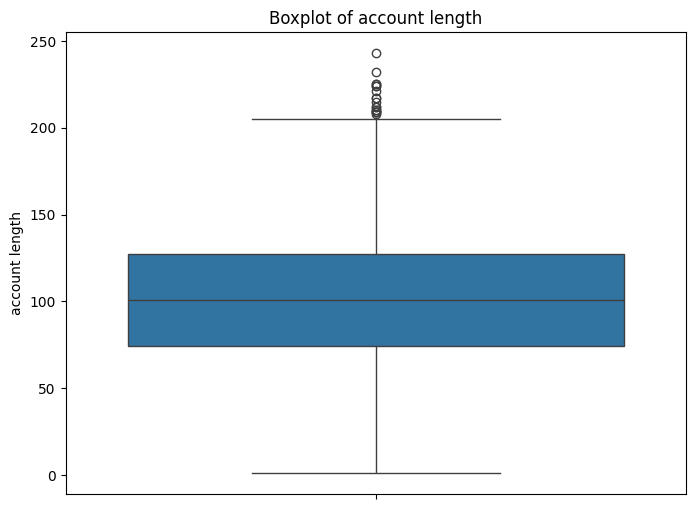

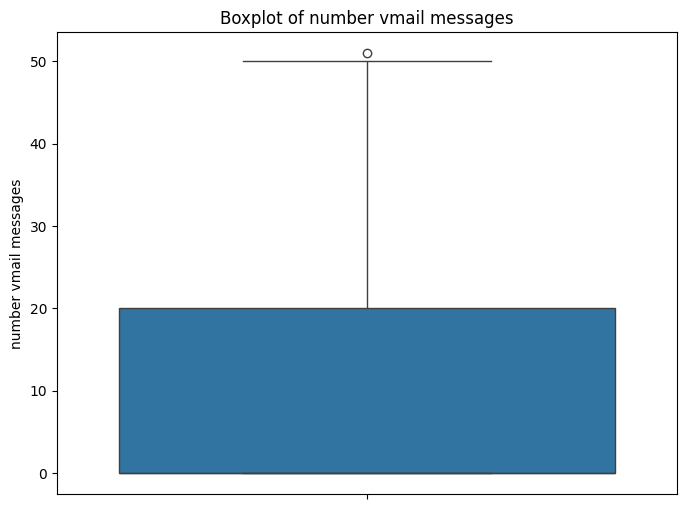

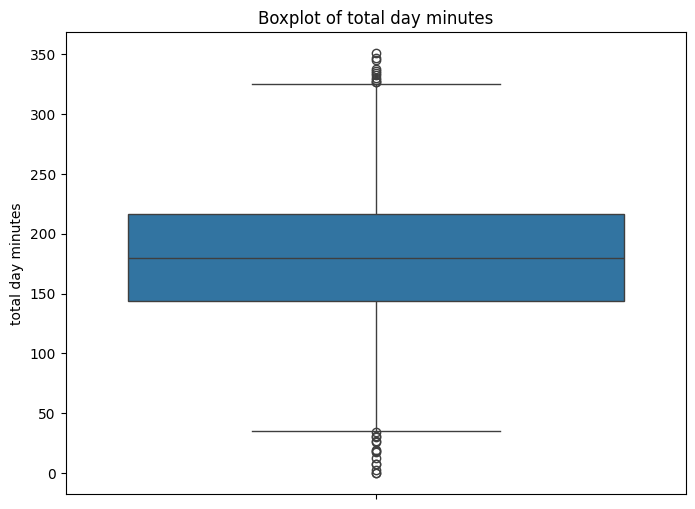

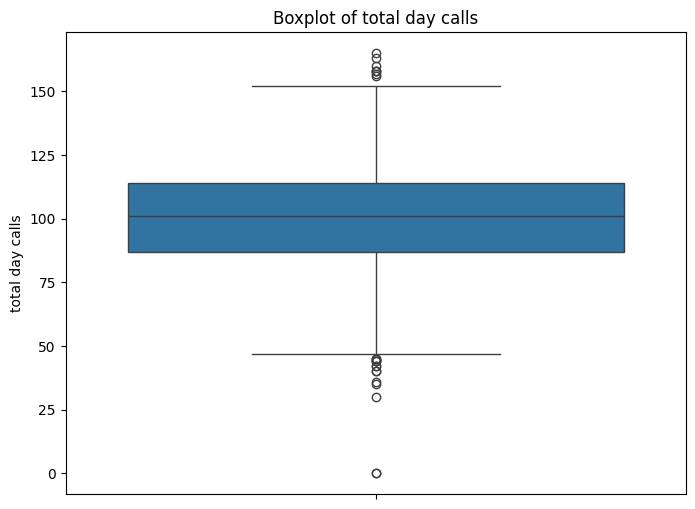

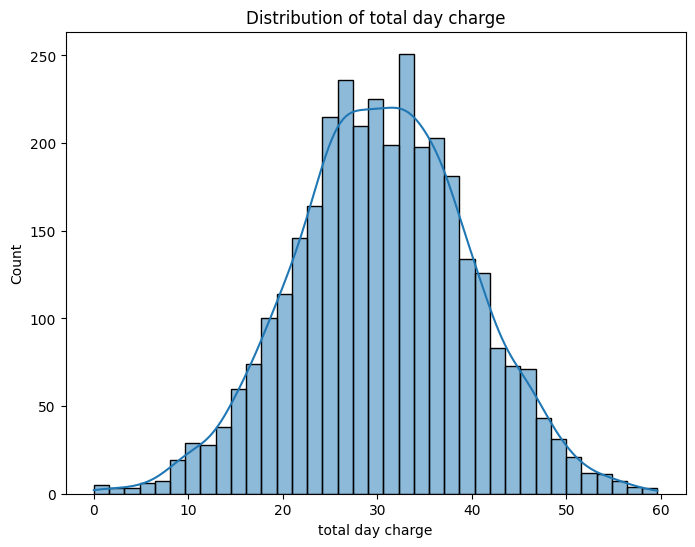

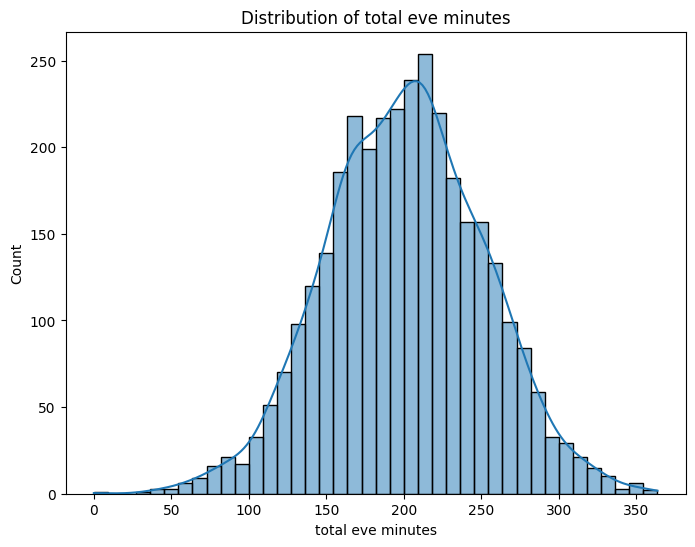

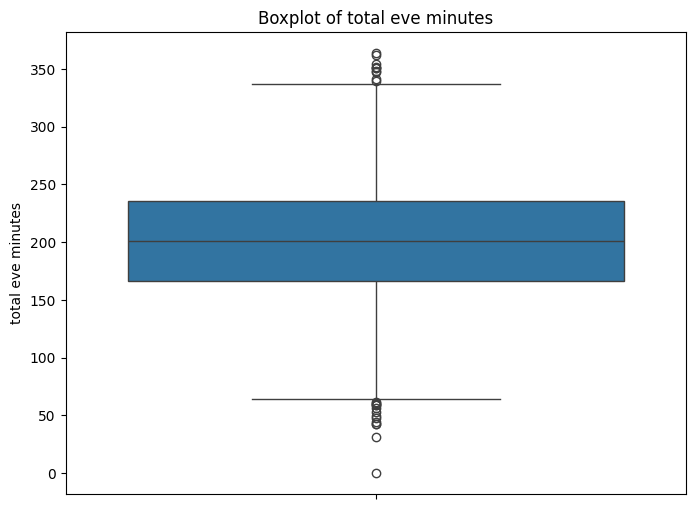

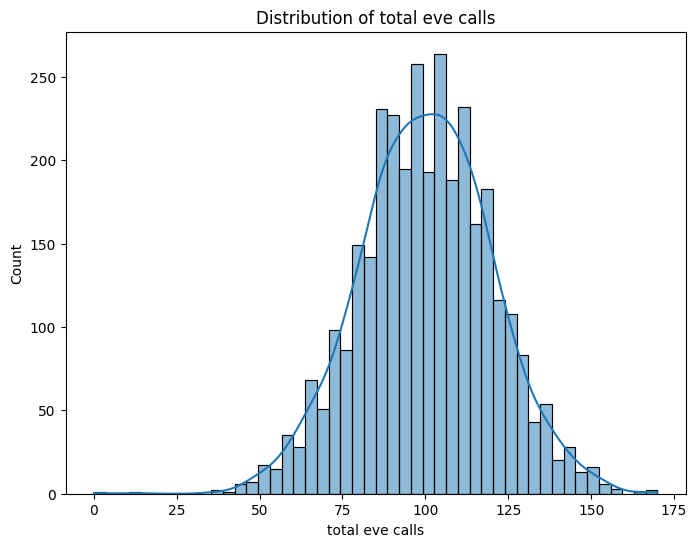

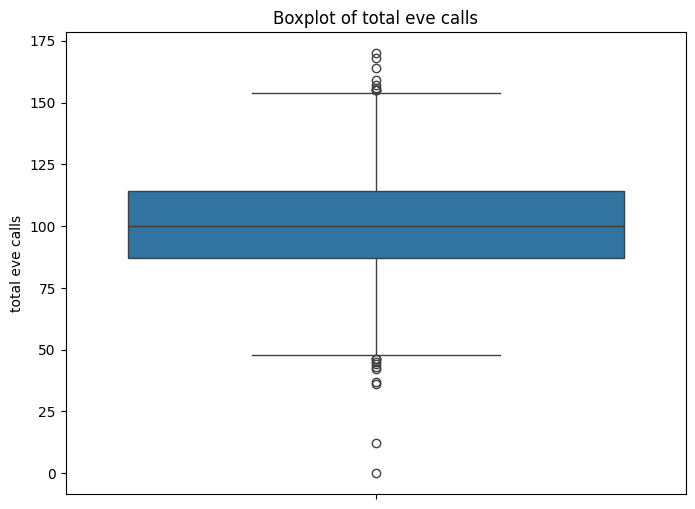

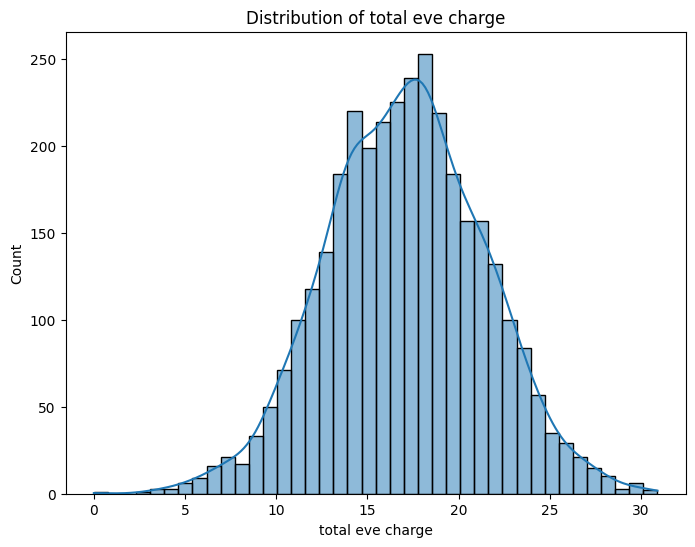

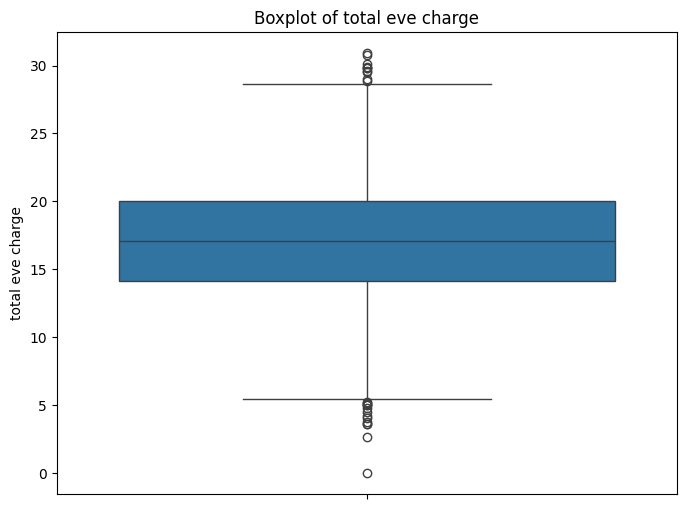

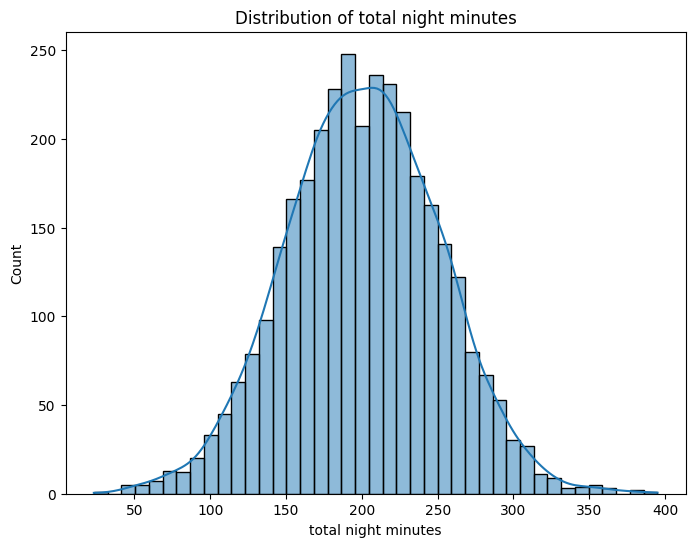

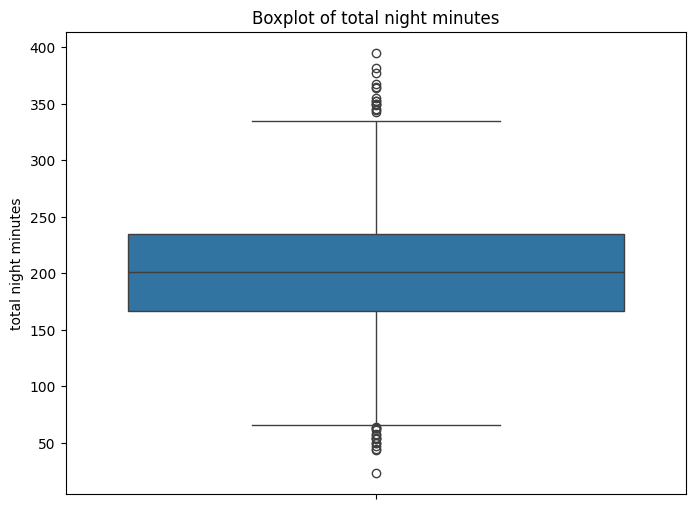

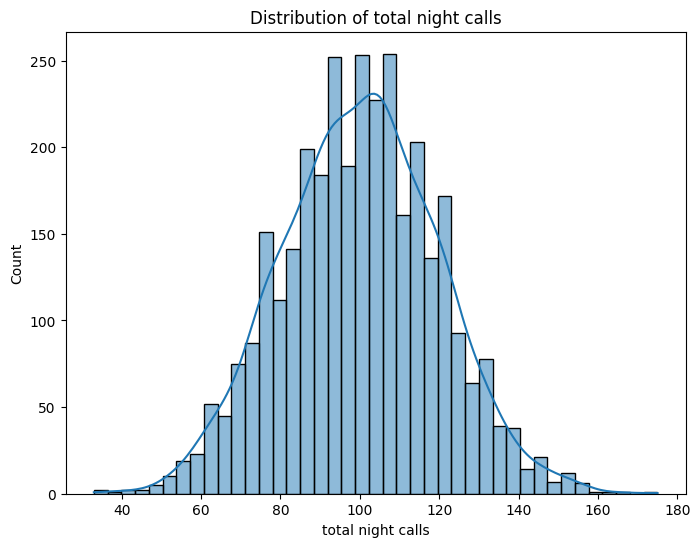

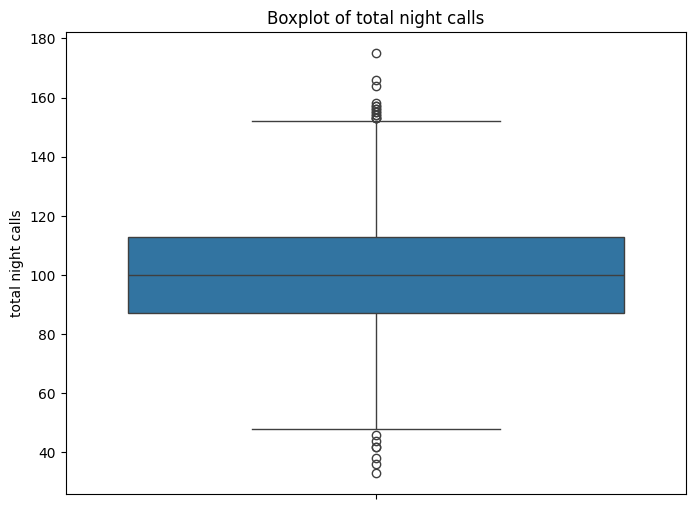

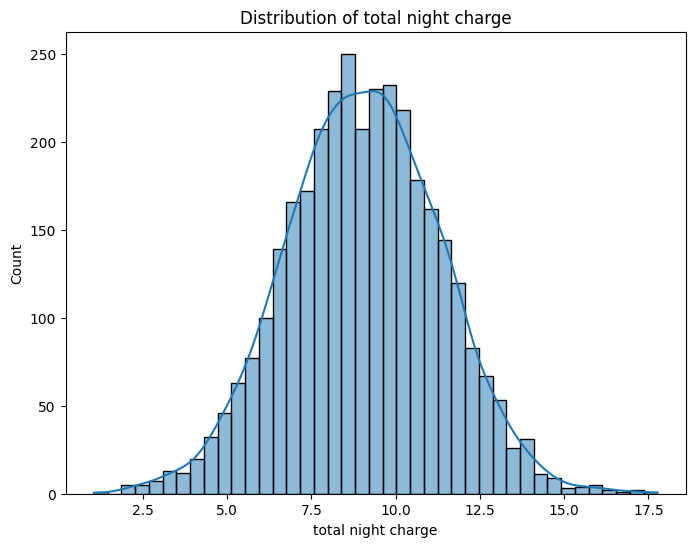

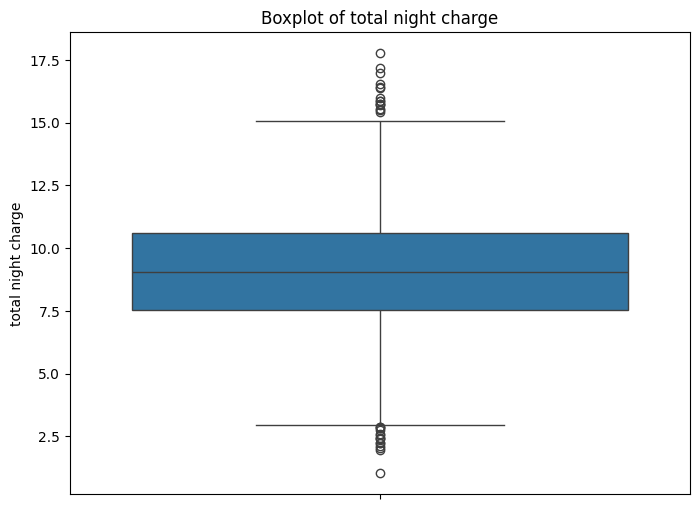

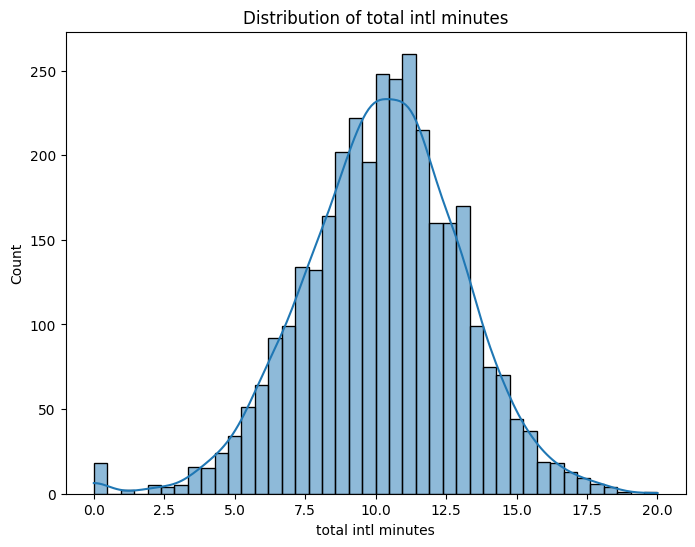

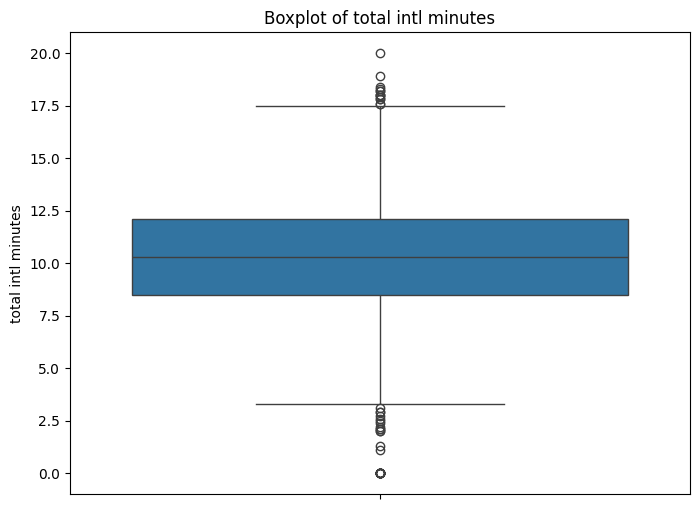

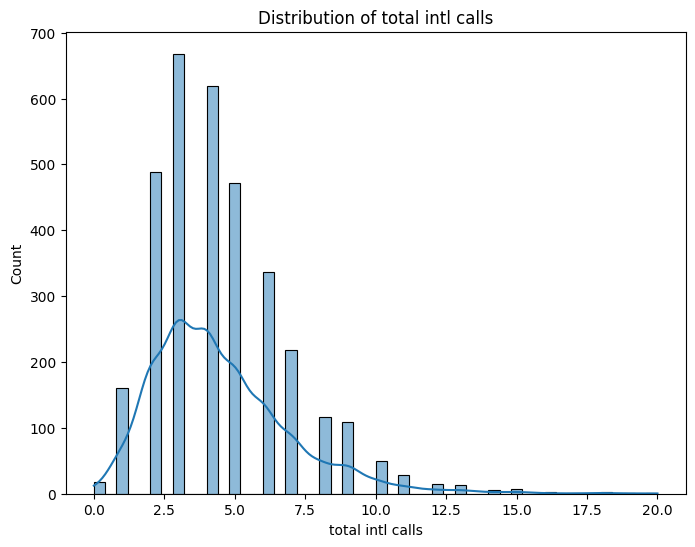

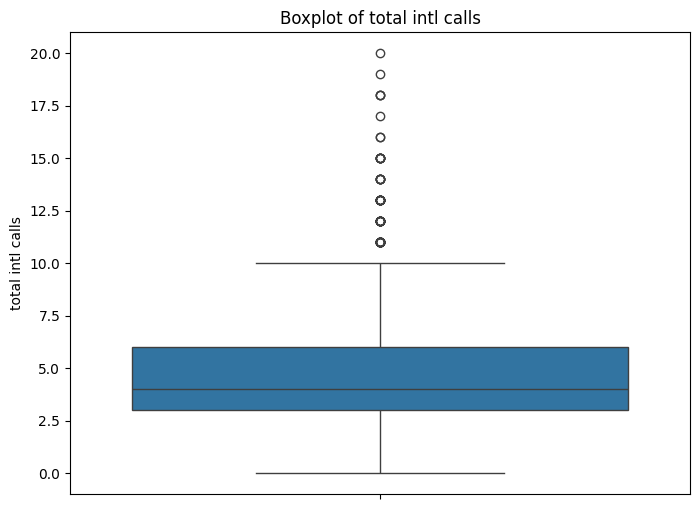

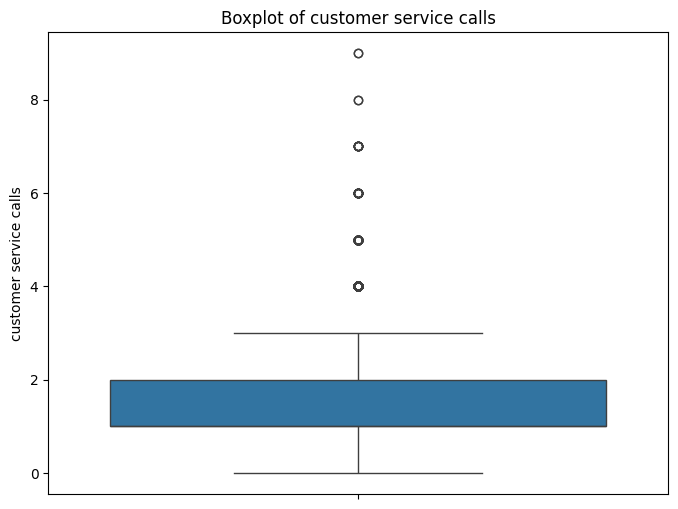

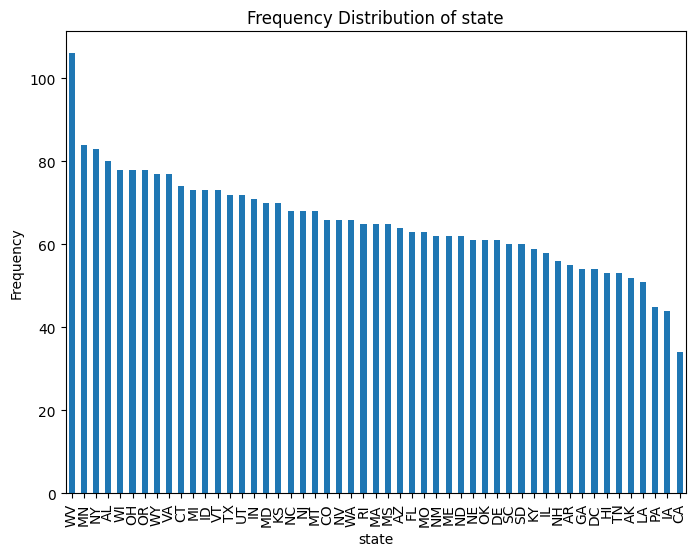

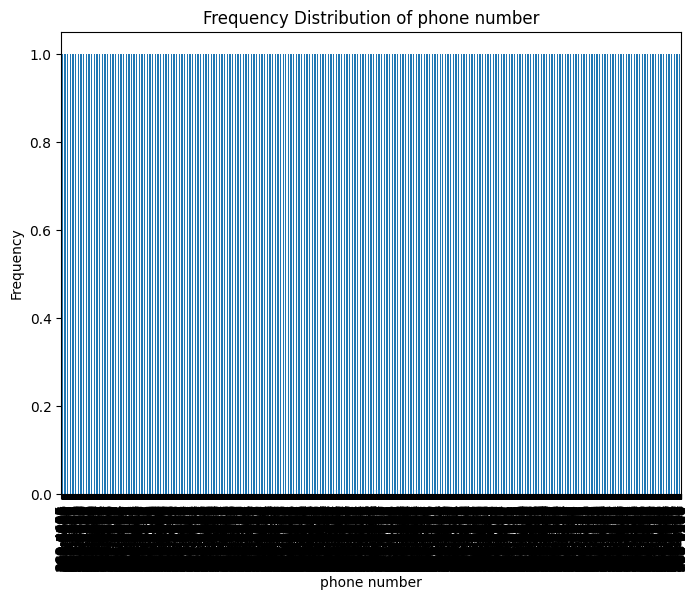

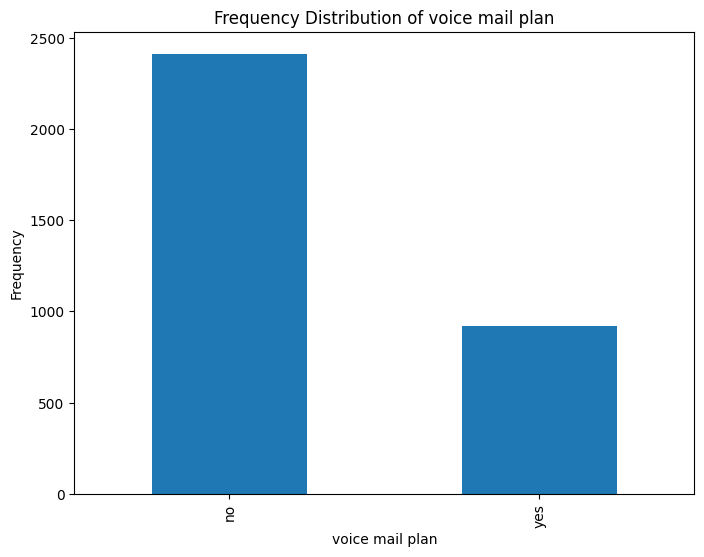

In [50]:
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical features univariate analysis
categorical_features = df.select_dtypes(exclude=np.number).columns
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### BIvariate analysis

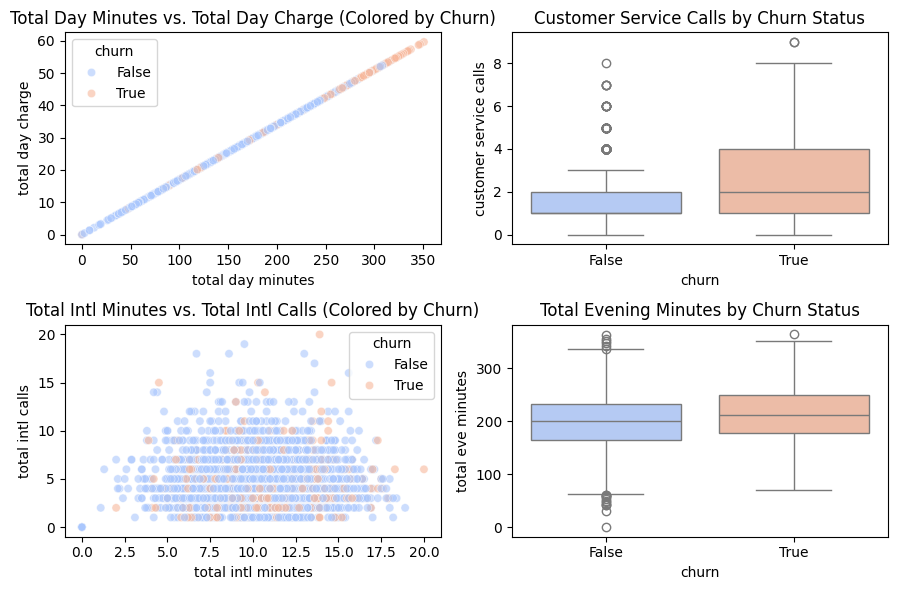

In [51]:
# Set up figure for bivariate analysis visualizations
plt.figure(figsize=(9, 6))

#  Churn vs. Total Day Minutes
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["total day minutes"], y=df["total day charge"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Day Minutes vs. Total Day Charge (Colored by Churn)")

#  Churn vs. Customer Service Calls
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")

#  Churn vs. Total Intl Minutes & Total Intl Calls
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["total intl minutes"], y=df["total intl calls"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Intl Minutes vs. Total Intl Calls (Colored by Churn)")

#  Churn vs. Total Evening Usage
plt.subplot(2, 2, 4)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Total Evening Minutes by Churn Status")

plt.tight_layout()
plt.show()

 Observations from Bivariate Analysis

1. Total Day Minutes vs. Total Day Charge:
There's a positive correlation between total day minutes and total day charge, as expected.
Customers who churn seem to be spread across various usage levels, without a clear separation in this plot.

2. Customer Service Calls by Churn Status:
 Customers who churned tend to have a higher median number of customer service calls.
A significant number of churned customers have made 4 or more calls, suggesting that customer service interactions might be a factor in churn.

3. Total Intl Minutes vs. Total Intl Calls:
 There's no clear pattern or significant separation between churned and non-churned customers based on international calls and minutes.

4. Total Evening Minutes by Churn Status:
  No clear difference in total evening minutes between customers who churned and those who didn't. The distributions overlap substantially.

## Overall:
 Customer service calls appear to be a potential predictor of churn.  Further investigation into the reasons behind these calls may be beneficial.  Total day minutes and charges don't show a clear distinction between churned and non-churned customers in this bivariate analysis.  International calls and minutes, and evening minutes don't appear strongly related to churn in these visualizations. More in-depth analysis, perhaps with other variables or different visualization techniques, might reveal additional insights.

### Multivariate  analysis

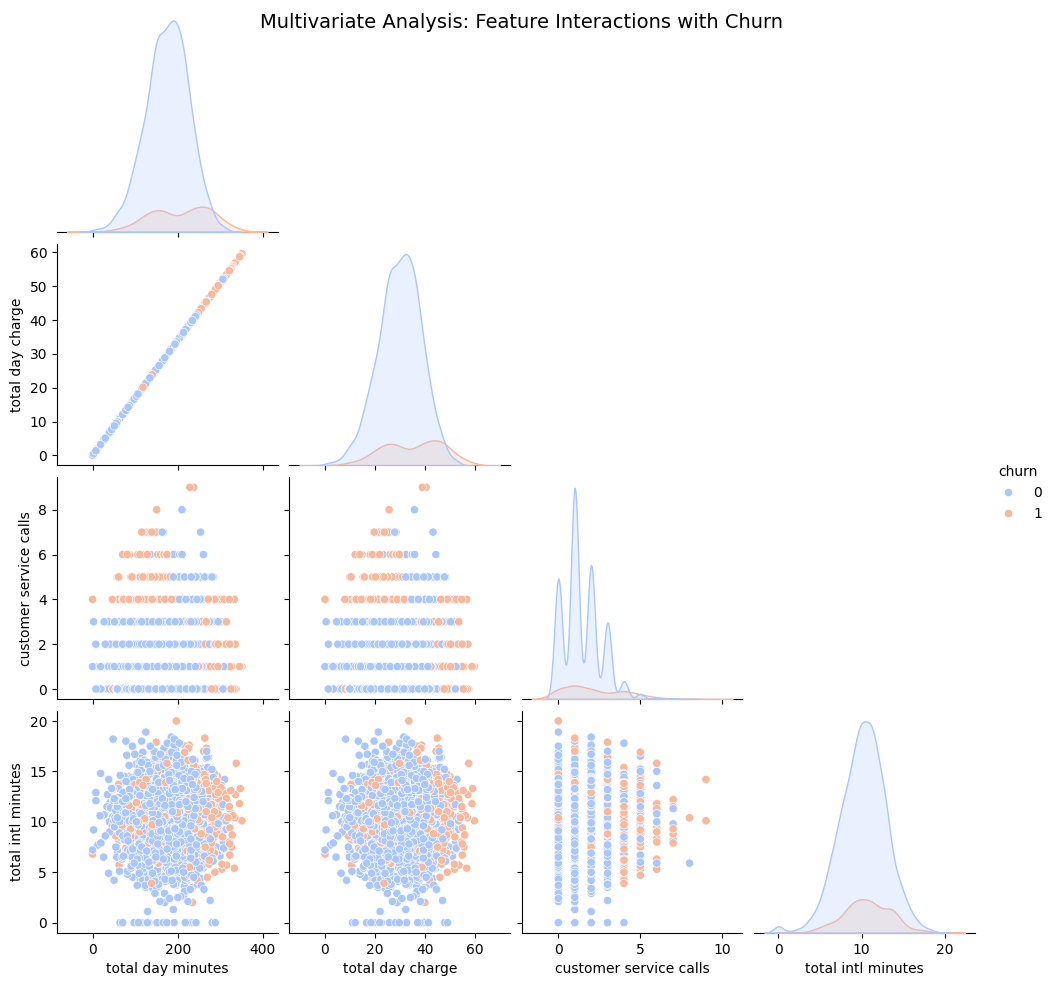

In [52]:
# Convert churn to integer type again (to avoid issues with pairplot)
df["churn"] = df["churn"].astype(int)

# Re-run pairplot for multivariate analysis
selected_features = ["total day minutes", "total day charge", "customer service calls", "total intl minutes", "churn"]

sns.pairplot(df[selected_features], hue="churn", palette="coolwarm", diag_kind="kde", corner=True)
plt.suptitle("Multivariate Analysis: Feature Interactions with Churn", fontsize=14)
plt.show()



## Key Observations from the Multivariate Analysis

1. Feature Interactions: The pairplot helps visualize how different features interact with each other and how these interactions might relate to customer churn. For example, you might observe that customers who churn tend to cluster in specific regions of the "total day minutes" vs. "total day charge" plot.  Look for patterns and clusters that are more prevalent among churned customers than non-churned ones.

2. Combined Effects:  The multivariate analysis allows you to see the combined effects of several features. For example, a customer with high "total day minutes" *and* a high number of "customer service calls" might have a higher probability of churning, something that may not be as apparent from individual bivariate plots.

3. Marginal Distributions: The diagonal plots show the distribution of each feature, broken down by churn status. This allows you to compare the distributions of features between churned and non-churned customers. For instance, if the distributions of "customer service calls" are significantly different (e.g., churned customers have a higher average number of calls), it provides more evidence for that variable's importance.

4. Identifying Potential Predictors: The goal is to look for features or combinations of features that clearly separate churned customers from non-churned customers in the plots.  These features are likely strong predictors of churn.




## Preprocessing


###encoding###

In [53]:
#Convert categorical variables into numerical formats using one-hot encoding.
df[['international plan', 'voice mail plan']] = df[['international plan', 'voice mail plan']].replace(['yes', 'no'], ['1', '0']).astype(int)
df = pd.get_dummies(df, columns=['state', 'area code'], dtype=int)
df.head()


account length phone number  international plan  voice mail plan  \
0             128     382-4657                   0                1   
1             107     371-7191                   0                1   
2             137     358-1921                   0                0   
3              84     375-9999                   1                0   
4              75     330-6626                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  ...  state_UT  \
0             45.07              197.4               99  ...         0   
1             27.47              195.5              103  ...         0   
2             41.38              121.2              110  ...         0   
3             50.90               61.9               88  ...         0   
4             28.34              148.3              122  ...         0   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  area code_408  \
0         0         0         0         0         0         0              0   
1         0         0         0         0         0         0              0   
2         0         0         0         0         0         0              0   
3         0         0         0         0         0         0              1   
4         0         0         0         0         0         0              0   

   area code_415  area code_510  
0              1              0  
1              1              0  
2              1              0  
3              0              0  
4              1              0  

[5 rows x 73 columns]

In [54]:
#Remove phone number, since it does not help in predicting churn
df = df.drop(columns=['phone number'])

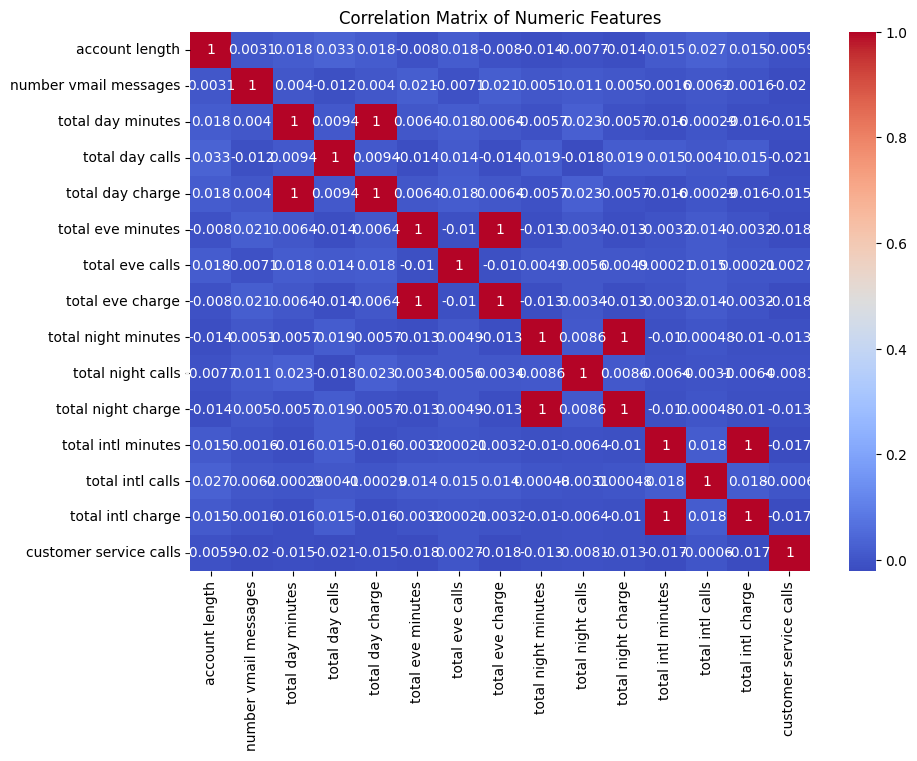

In [62]:
# Remove linear dependencies between features
numerical_features = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls',
    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
    'total intl calls', 'total intl charge', 'customer service calls'
]

correlation_matrix = df[numerical_features].corr(method='spearman')

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Churn Distribution

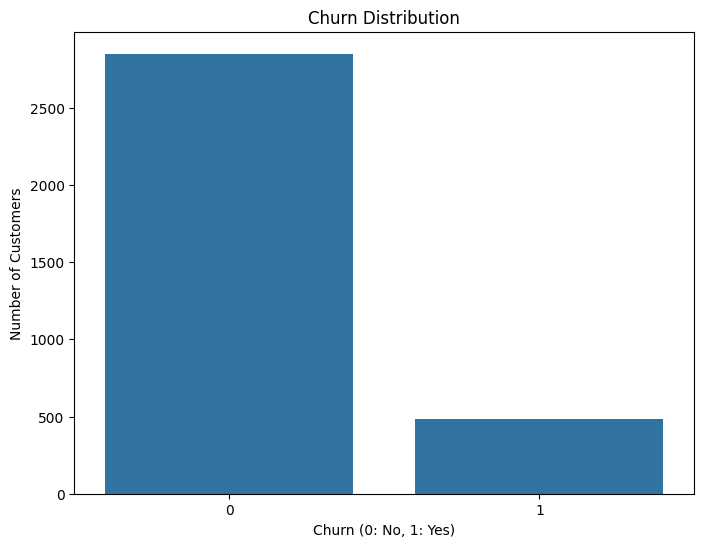

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()


In [16]:
df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  customer service calls  3333 non-null   int64  
 13  churn                   3333 non-null   int64  
 14  state_AK                3333 non-null   

###Scaling###

In [17]:
#split your dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)  # Features
y = df['churn']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [18]:
#Standardize the training and testing sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_valid_st = scaler.transform(X_test)

In [19]:
# Convert scaled arrays back to DataFrames for easier inspection
X_train_scaled_df = pd.DataFrame(X_train_st, columns=X.columns) # Change X_train_scaled to X_train_st
X_test_scaled_df = pd.DataFrame(X_valid_st, columns=X.columns) # Change X_test_scaled to X_valid_st

# Display the mean and standard deviation of the scaled training data
print("Training Data Mean:\n", X_train_scaled_df.mean())
print("\nTraining Data Standard Deviation:\n", X_train_scaled_df.std())

# Display the mean and standard deviation of the scaled testing data
print("\nTesting Data Mean:\n", X_test_scaled_df.mean())
print("\nTesting Data Standard Deviation:\n", X_test_scaled_df.std())

Training Data Mean:
 account length          -1.421654e-17
international plan      -4.975789e-17
voice mail plan         -6.184195e-17
number vmail messages   -4.620376e-17
total day minutes        1.610023e-16
                             ...     
state_WV                -2.061398e-17
state_WY                -1.421654e-17
area code_408            5.686617e-18
area code_415           -6.895023e-17
area code_510           -2.843308e-17
Length: 67, dtype: float64

Training Data Standard Deviation:
 account length           1.0002
international plan       1.0002
voice mail plan          1.0002
number vmail messages    1.0002
total day minutes        1.0002
                          ...  
state_WV                 1.0002
state_WY                 1.0002
area code_408            1.0002
area code_415            1.0002
area code_510            1.0002
Length: 67, dtype: float64

Testing Data Mean:
 account length           0.011575
international plan      -0.083161
voice mail plan          0.055

## Modeling

### Regression


####logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_st, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_valid_st)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       719
           1       0.47      0.22      0.30       115

    accuracy                           0.86       834
   macro avg       0.68      0.59      0.61       834
weighted avg       0.83      0.86      0.84       834

[[691  28]
 [ 90  25]]
Accuracy: 0.8585131894484412


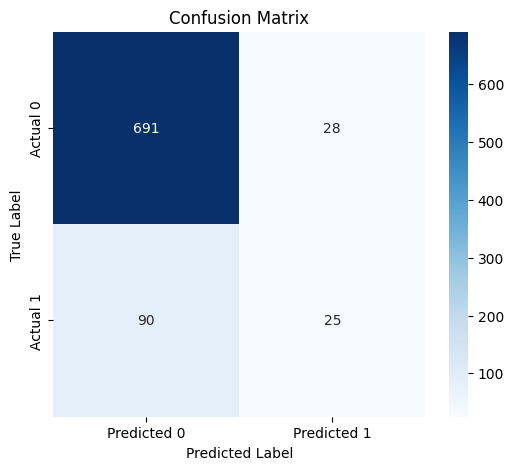

In [21]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification

#### Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


clf = DecisionTreeClassifier(random_state=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9028776978417267
Recall: 0.6869565217391305
Precision: 0.6370967741935484
F1-score: 0.6610878661087866
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       719
           1       0.64      0.69      0.66       115

    accuracy                           0.90       834
   macro avg       0.79      0.81      0.80       834
weighted avg       0.91      0.90      0.90       834



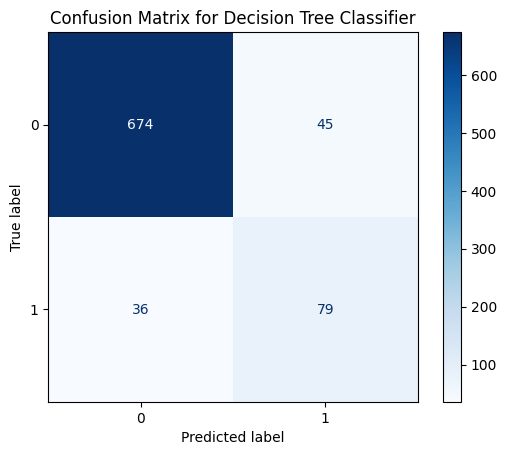

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

####random forest####

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_st, y_train)
y_pred = rf.predict(X_valid_st)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9328537170263789
Recall: 0.5478260869565217
Precision: 0.9402985074626866
F1-score: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       719
           1       0.94      0.55      0.69       115

    accuracy                           0.93       834
   macro avg       0.94      0.77      0.83       834
weighted avg       0.93      0.93      0.93       834



In [25]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#### K-NN model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the value of k
knn.fit(X_train_st, y_train)
y_pred = knn.predict(X_valid_st)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8537170263788969
Recall: 0.06086956521739131
Precision: 0.3333333333333333
F1-score: 0.10294117647058823
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       719
           1       0.33      0.06      0.10       115

    accuracy                           0.85       834
   macro avg       0.60      0.52      0.51       834
weighted avg       0.79      0.85      0.81       834



In [27]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


#### SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
svm = SVC(random_state=3)
svm.fit(X_train_st, y_train)
y_pred = svm.predict(X_valid_st)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8669064748201439
Recall: 0.043478260869565216
Precision: 0.8333333333333334
F1-score: 0.08264462809917356
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       719
           1       0.83      0.04      0.08       115

    accuracy                           0.87       834
   macro avg       0.85      0.52      0.51       834
weighted avg       0.86      0.87      0.81       834



In [29]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

####Neural network

In [30]:
from sklearn.neural_network import MLPClassifier

NeuralNet = MLPClassifier(random_state=5, max_iter=1000)
NeuralNet.fit(X_train_st, y_train)
y_pred = NeuralNet.predict(X_valid_st)

df_scores = pd.DataFrame({'Neural network': [f1_score(y_pred, y_test), accuracy_score(y_pred, y_test), recall_score(y_pred, y_test)]}, index=['f1_score', 'accuracy_score', 'recall_score'])
df_scores.T

f1_score  accuracy_score  recall_score
Neural network  0.494845        0.882494      0.607595

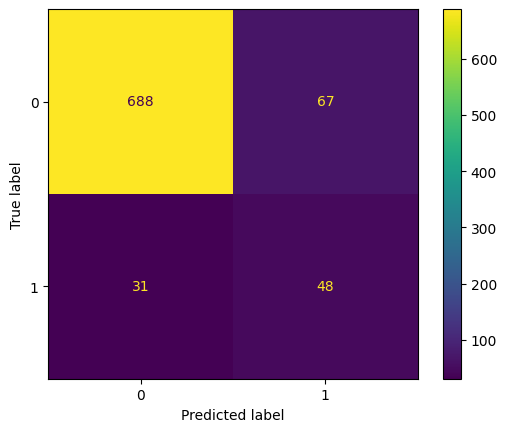

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def show_confusion_matrix(y_true, y_pred):
    """
    Displays the confusion matrix.

    Args:
        y_true: The true target values.
        y_pred: The predicted target values.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()




show_confusion_matrix(y_pred, y_test)

#### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
nb = GaussianNB()
nb.fit(X_train_st, y_train)
y_pred = nb.predict(X_valid_st)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5779376498800959
Recall: 0.591304347826087
Precision: 0.18230563002680966
F1-score: 0.2786885245901639
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       719
           1       0.18      0.59      0.28       115

    accuracy                           0.58       834
   macro avg       0.54      0.58      0.49       834
weighted avg       0.80      0.58      0.64       834



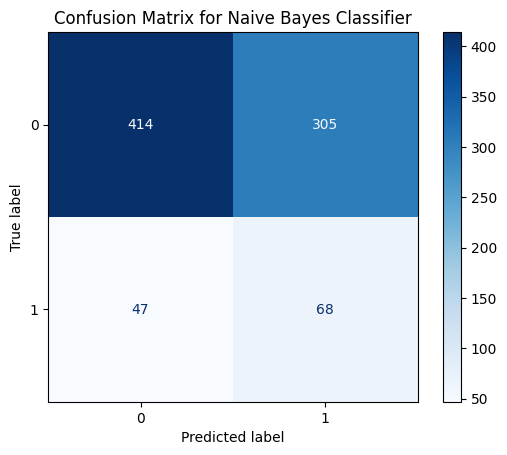

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

### Hyperparameter Tuning

##tuned decision tree model

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1') # Use 'f1' scoring

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (tuned): {accuracy}")
print(f"Recall (tuned): {recall}")
print(f"Precision (tuned): {precision}")
print(f"F1-score (tuned): {f1}")

print(classification_report(y_test, y_pred))


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy (tuned): 0.9436450839328537
Recall (tuned): 0.7217391304347827
Precision (tuned): 0.8469387755102041
F1-score (tuned): 0.7793427230046949
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       719
           1       0.85      0.72      0.78       115

    accuracy                           0.94       834
   macro avg       0.90      0.85      0.87       834
weighted avg       0.94      0.94      0.94       834



###tuned random forest model

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_st, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test data
y_pred = best_model.predict(X_valid_st)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (tuned): {accuracy}")
print(f"Recall (tuned): {recall}")
print(f"Precision (tuned): {precision}")
print(f"F1-score (tuned): {f1}")

print(classification_report(y_test, y_pred))


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy (tuned): 0.9304556354916067
Recall (tuned): 0.5043478260869565
Precision (tuned): 0.9830508474576272
F1-score (tuned): 0.6666666666666666
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       719
           1       0.98      0.50      0.67       115

    accuracy                           0.93       834
   macro avg       0.95      0.75      0.81       834
weighted avg       0.93      0.93      0.92       834



## Model evaluation

Logistic Regression Metrics:
Accuracy: 0.8585131894484412
Recall: 0.21739130434782608
Precision: 0.4716981132075472
F1-score: 0.2976190476190476
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       719
           1       0.47      0.22      0.30       115

    accuracy                           0.86       834
   macro avg       0.68      0.59      0.61       834
weighted avg       0.83      0.86      0.84       834



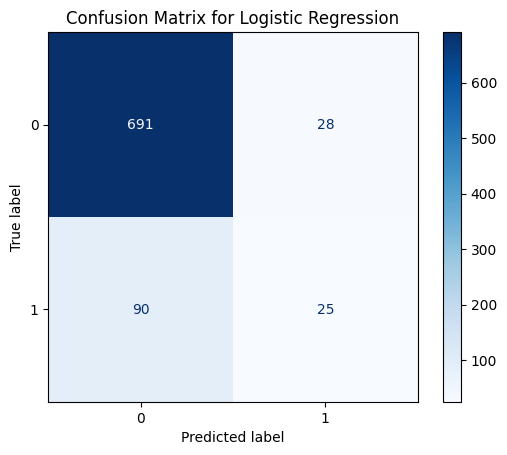

Decision Tree Metrics:
Accuracy: 0.3381294964028777
Recall: 0.8695652173913043
Precision: 0.15698587127158556
F1-score: 0.26595744680851063
              precision    recall  f1-score   support

           0       0.92      0.25      0.40       719
           1       0.16      0.87      0.27       115

    accuracy                           0.34       834
   macro avg       0.54      0.56      0.33       834
weighted avg       0.82      0.34      0.38       834



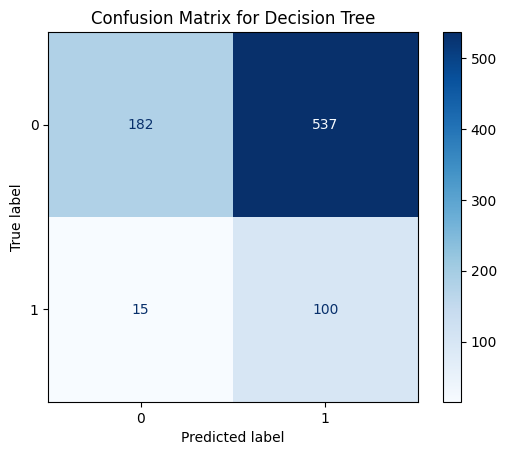

Random Forest Metrics:
Accuracy: 0.9328537170263789
Recall: 0.5478260869565217
Precision: 0.9402985074626866
F1-score: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       719
           1       0.94      0.55      0.69       115

    accuracy                           0.93       834
   macro avg       0.94      0.77      0.83       834
weighted avg       0.93      0.93      0.93       834



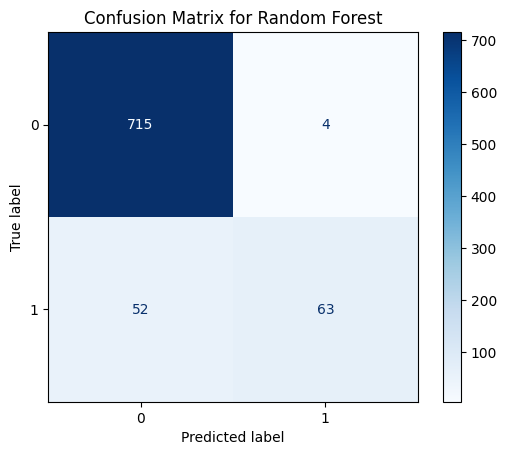

K-NN Metrics:
Accuracy: 0.8537170263788969
Recall: 0.06086956521739131
Precision: 0.3333333333333333
F1-score: 0.10294117647058823
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       719
           1       0.33      0.06      0.10       115

    accuracy                           0.85       834
   macro avg       0.60      0.52      0.51       834
weighted avg       0.79      0.85      0.81       834



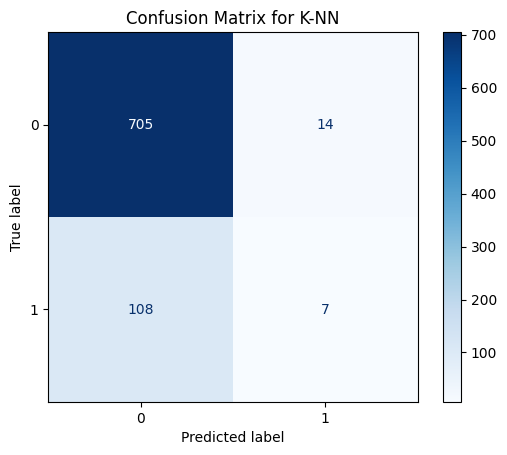

SVM Metrics:
Accuracy: 0.8669064748201439
Recall: 0.043478260869565216
Precision: 0.8333333333333334
F1-score: 0.08264462809917356
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       719
           1       0.83      0.04      0.08       115

    accuracy                           0.87       834
   macro avg       0.85      0.52      0.51       834
weighted avg       0.86      0.87      0.81       834



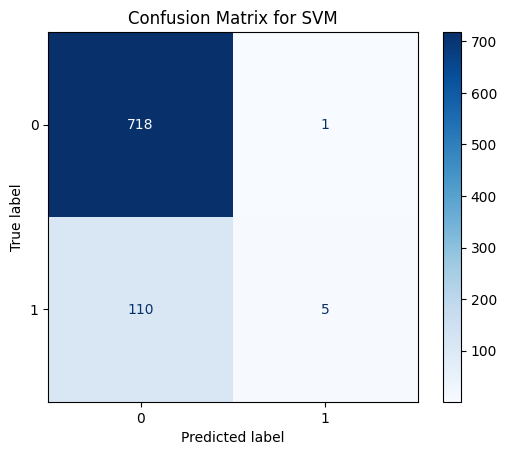

Neural Network Metrics:
Accuracy: 0.882494004796163
Recall: 0.41739130434782606
Precision: 0.6075949367088608
F1-score: 0.4948453608247423
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       719
           1       0.61      0.42      0.49       115

    accuracy                           0.88       834
   macro avg       0.76      0.69      0.71       834
weighted avg       0.87      0.88      0.87       834



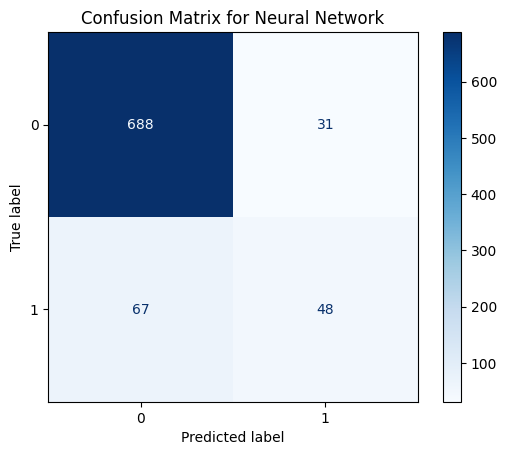

Naive Bayes Metrics:
Accuracy: 0.5779376498800959
Recall: 0.591304347826087
Precision: 0.18230563002680966
F1-score: 0.2786885245901639
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       719
           1       0.18      0.59      0.28       115

    accuracy                           0.58       834
   macro avg       0.54      0.58      0.49       834
weighted avg       0.80      0.58      0.64       834



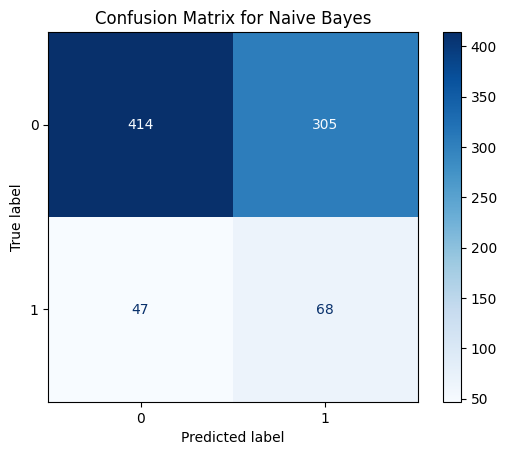

In [36]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Assuming X_train_st, y_train, X_valid_st, y_test, y_valid are defined from previous code

def evaluate_model(model, model_name, X_test, y_test):
    # Changed X_valid_ to X_test to match function parameter and existing variables
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1-score: {f1}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Evaluate all models
# Calling the function with the correct test data
evaluate_model(logreg, "Logistic Regression", X_valid_st, y_test)
evaluate_model(best_model, "Decision Tree", X_test, y_test)
evaluate_model(rf, "Random Forest", X_valid_st, y_test)
evaluate_model(knn, "K-NN", X_valid_st, y_test)
evaluate_model(svm, "SVM", X_valid_st, y_test)
evaluate_model(NeuralNet, "Neural Network", X_valid_st, y_test)
evaluate_model(nb, "Naive Bayes", X_valid_st, y_test)

## Conclusion  & Recommendation

# Conclusion

 Based on the evaluation of various classification models, including Logistic Regression, Decision Tree, Random Forest, K-NN, SVM, Neural Network, and Naive Bayes, the Random Forest classifier, after hyperparameter tuning, demonstrates superior performance in predicting customer churn for SyriaTel.  This is evidenced by its high F1-score, accuracy, precision, and recall.  While other models achieved reasonable performance, the Random Forest model's ability to balance precision and recall makes it the most suitable choice for this business problem.  The tuned Decision Tree also performs well, but Random Forest provides a more robust prediction.

## Recommendation

1. **Deploy the Tuned Random Forest Model:** Implement the tuned Random Forest model into SyriaTel's operational systems to predict customer churn in real-time. This allows for proactive customer retention strategies.

2. **Focus on Key Predictors:** Analyze the feature importances derived from the Random Forest model to identify the most significant drivers of customer churn.  This will help focus retention efforts on the most impactful factors.  Further investigation into these factors might reveal opportunities for service improvement or targeted marketing campaigns.

3. **Regular Model Updates:**  Customer behavior and market dynamics can shift over time. Regularly retrain and evaluate the churn prediction model using updated data to ensure its continued accuracy and effectiveness.

4. **Implement a Customer Retention Strategy:** Based on the model's predictions, develop and implement targeted retention strategies for at-risk customers. This could include personalized offers, loyalty programs, improved customer service, or proactive communication.

5. **Consider Ensemble Methods:** Explore other ensemble methods or stacking techniques that combine the strengths of multiple models to potentially further improve predictive accuracy.

6. **Monitor Model Performance:**  Continuously monitor the model's performance in a production environment and re-evaluate its effectiveness regularly.

7. **Explore External Data Sources:** Consider incorporating external data sources (if available) such as economic indicators, competitor activity, or market trends to enhance the model's predictive power.
